In [1]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [2]:
import pandas as pd

In [3]:
df = pd.read_table('data/parsed/202010.tsv', index_col=0)
df.head(20)

,date,time,mothermilk,milk,expressedmilk,small,big,sleep
0,2020-10-01,01:00:00,11.0,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,03:10:00,30.0,NaN,NaN,NaN,NaN,NaN
2,2020-10-01,06:45:00,NaN,NaN,NaN,NaN,NaN,0.0
3,2020-10-01,06:45:00,NaN,NaN,NaN,1.0,NaN,NaN
4,2020-10-01,06:45:00,23.0,NaN,NaN,NaN,NaN,NaN
5,2020-10-01,07:50:00,NaN,NaN,NaN,1.0,NaN,NaN
6,2020-10-01,07:50:00,NaN,NaN,NaN,NaN,1.0,NaN
7,2020-10-01,08:45:00,9.0,NaN,NaN,NaN,NaN,NaN
8,2020-10-01,08:55:00,NaN,NaN,NaN,NaN,NaN,1.0
9,2020-10-01,09:20:00,NaN,NaN,NaN,NaN,NaN,0.0


datetime indexをセット

In [4]:
df['datetime'] = pd.to_datetime(df['date'] + 'T' + df['time'])
df = df.set_index('datetime')
df

,date,time,mothermilk,milk,expressedmilk,small,big,sleep
datetime,,,,,,,,
2020-10-01 01:00:00,2020-10-01,01:00:00,11.0,NaN,NaN,NaN,NaN,NaN
2020-10-01 03:10:00,2020-10-01,03:10:00,30.0,NaN,NaN,NaN,NaN,NaN
2020-10-01 06:45:00,2020-10-01,06:45:00,NaN,NaN,NaN,NaN,NaN,0.0
2020-10-01 06:45:00,2020-10-01,06:45:00,NaN,NaN,NaN,1.0,NaN,NaN
2020-10-01 06:45:00,2020-10-01,06:45:00,23.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-10-31 23:15:00,2020-10-31,23:15:00,NaN,NaN,NaN,1.0,NaN,NaN
2020-10-31 23:40:00,2020-10-31,23:40:00,NaN,NaN,NaN,NaN,NaN,1.0
2020-10-31 23:40:00,2020-10-31,23:40:00,230.0,NaN,NaN,NaN,NaN,NaN


In [5]:
import datetime

by_time = df.groupby(lambda x: datetime.time(hour=x.hour)).sum()

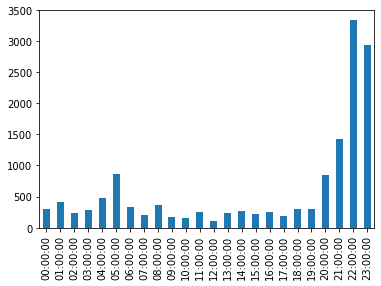

In [6]:
by_time['mothermilk'].plot.bar()

In [7]:
df.groupby('datetime').sum()

,mothermilk,milk,expressedmilk,small,big,sleep
datetime,,,,,,
2020-10-01 01:00:00,11.0,0.0,0.0,0.0,0.0,0.0
2020-10-01 03:10:00,30.0,0.0,0.0,0.0,0.0,0.0
2020-10-01 06:45:00,23.0,0.0,0.0,1.0,0.0,0.0
2020-10-01 07:50:00,0.0,0.0,0.0,1.0,1.0,0.0
2020-10-01 08:45:00,9.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-10-31 21:05:00,0.0,0.0,0.0,0.0,0.0,1.0
2020-10-31 21:50:00,12.0,0.0,0.0,0.0,0.0,0.0
2020-10-31 22:05:00,0.0,0.0,0.0,0.0,0.0,1.0


睡眠時間 (分) をsleep列にセット

In [8]:
import numpy as np

sleep_series = pd.Series()
sleep_in_time = 0
df['sleep_time'] = np.nan

for index, row in df.iterrows():
    if row['sleep'] == 1:
        sleep_in_time = index
    if row['sleep'] == 0 and sleep_in_time is not 0:
        delta = index - sleep_in_time
        df.loc[sleep_in_time, 'sleep_time'] = delta.total_seconds() / 60

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


5分間隔のデータに整理

In [9]:
df_5min = df.groupby(pd.Grouper(freq='5min')).sum()
df_5min['sleep_time'] = df['sleep_time'].groupby(pd.Grouper(freq='5min')).mean()  # 同じ値が同じ時刻のデータすべてに入ってしまっている

1時間ごとに、その時間に入眠した場合にどれくらい(分)眠り続けたかの平均
(5分ごとのデータで平均されるので、12をかける)

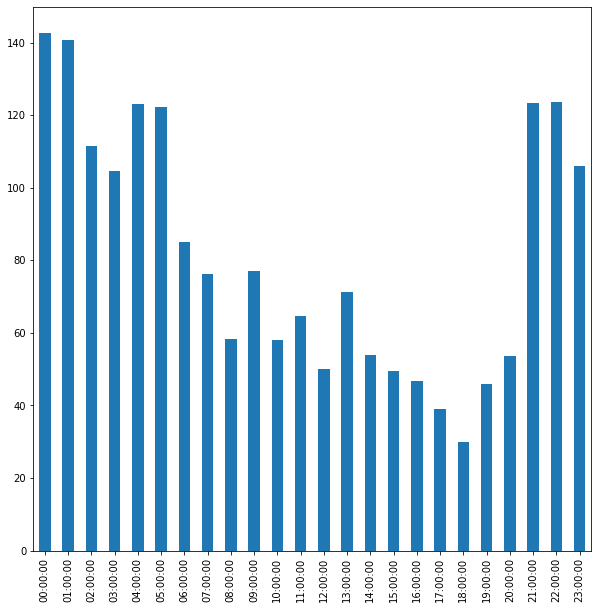

In [10]:
by_hour = df_5min.groupby(lambda x: datetime.time(hour=x.hour)).mean()
by_hour['sleep_time'].plot.bar(figsize=(10,10))

分布を確認

In [11]:
df_5min[df_5min['mothermilk'] > 0]['mothermilk'].describe()

count    368.000000
mean      39.331522
std       66.304753
min        3.000000
25%       12.000000
50%       17.000000
75%       27.000000
max      462.000000
Name: mothermilk, dtype: float64

In [12]:
df_5min[df_5min['milk'] > 0]['milk'].describe()

count     33.000000
mean      98.484848
std       28.627043
min       50.000000
25%      100.000000
50%      100.000000
75%      120.000000
max      200.000000
Name: milk, dtype: float64

In [13]:
df_5min[df_5min['expressedmilk'] > 0]['expressedmilk'].describe()

count      3.000000
mean      73.333333
std       25.166115
min       50.000000
25%       60.000000
50%       70.000000
75%       85.000000
max      100.000000
Name: expressedmilk, dtype: float64

In [14]:
df_5min[df_5min['sleep_time'] > 0]['sleep_time'].describe()

count    276.000000
mean      83.615942
std       67.067274
min        5.000000
25%       30.000000
50%       65.000000
75%      125.000000
max      475.000000
Name: sleep_time, dtype: float64

In [15]:
df['2020-10-02']

,date,time,mothermilk,milk,expressedmilk,small,big,sleep,sleep_time
datetime,,,,,,,,,
2020-10-02 00:00:00,2020-10-02,00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,140.0
2020-10-02 02:20:00,2020-10-02,02:20:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-10-02 02:30:00,2020-10-02,02:30:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2020-10-02 02:30:00,2020-10-02,02:30:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2020-10-02 02:30:00,2020-10-02,02:30:00,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-02 03:00:00,2020-10-02,03:00:00,NaN,NaN,NaN,NaN,NaN,1.0,135.0
2020-10-02 05:15:00,2020-10-02,05:15:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-10-02 05:15:00,2020-10-02,05:15:00,45.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-02 06:00:00,2020-10-02,06:00:00,NaN,NaN,NaN,NaN,NaN,1.0,80.0


In [16]:
df[:'2020-10-02 03:00'][df[:'2020-10-02 03:00']['mothermilk'] > 0].iloc[-1]

date             2020-10-02
time               02:30:00
mothermilk               20
milk                    NaN
expressedmilk           NaN
small                   NaN
big                     NaN
sleep                   NaN
sleep_time              NaN
Name: 2020-10-02 02:30:00, dtype: object

In [21]:
def last_event_by(df, time, column):
    rows = df[:time][df[:time][column] > 0]
    if len(rows) == 0:
        return 0, 0, 0
    row = rows.iloc[-1]
    delta = time - row.name
    return row.name, row[column], delta.total_seconds() / 60

last_event_by(df_5min, pd.to_datetime('2020-10-02 03:00'), 'mothermilk')

(Timestamp('2020-10-02 02:30:00'), 20.0, 30.0)

In [22]:
for index, row in df_5min.head(300).iterrows():
    if row['sleep_time'] > 0:
        print(last_event_by(df_5min, index, 'mothermilk'))

(Timestamp('2020-10-01 08:45:00'), 9.0, 10.0)
(Timestamp('2020-10-01 08:45:00'), 9.0, 90.0)
(Timestamp('2020-10-01 11:55:00'), 17.0, 75.0)
(Timestamp('2020-10-01 14:10:00'), 26.0, 25.0)
(Timestamp('2020-10-01 15:55:00'), 21.0, 25.0)
(Timestamp('2020-10-01 15:55:00'), 21.0, 85.0)
(Timestamp('2020-10-01 15:55:00'), 21.0, 135.0)
(Timestamp('2020-10-01 21:30:00'), 6.0, 10.0)
(Timestamp('2020-10-01 23:40:00'), 236.0, 20.0)
